# Pré-processamento de dados para Machine Learning

## Preparação dos dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [10]:
dados.head()

,churn,customer_gender,cidadao_senior,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,...,internet_deviceprotection,suporte_tecnico,streaming_tv,internet_streamingmovies,contrato,fatura_online,metodo_pagamento,gastos_mensais,gastos_totais,contas_diarias
0,0.0,Female,0,1,1,9,1,0,DSL,No,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0.0,Male,0,0,0,9,1,1,DSL,No,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1.0,Male,0,0,0,4,1,0,Fiber optic,No,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1.0,Male,1,1,0,13,1,0,Fiber optic,No,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1.0,Female,1,1,0,3,1,0,Fiber optic,No,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [11]:
dados.head()

,churn,customer_gender,cidadao_senior,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,...,internet_deviceprotection,suporte_tecnico,streaming_tv,internet_streamingmovies,contrato,fatura_online,metodo_pagamento,gastos_mensais,gastos_totais,contas_diarias
0,0.0,Female,0,1,1,9,1,0,DSL,No,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0.0,Male,0,0,0,9,1,1,DSL,No,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1.0,Male,0,0,0,4,1,0,Fiber optic,No,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1.0,Male,1,1,0,13,1,0,Fiber optic,No,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1.0,Female,1,1,0,3,1,0,Fiber optic,No,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [30]:
#Transformando as variáveis categórias em numericas com one hot coding
colunas_categoricas = ['customer_gender', 'servico_internet', 'contrato', 'metodo_pagamento']

df_encoder = pd.get_dummies(dados, columns=colunas_categoricas, drop_first=True)

print(df_encoder.head())

   churn  cidadao_senior  parceiro  dependentes  meses_contrato  \
0    0.0               0         1            1               9   
1    0.0               0         0            0               9   
2    1.0               0         0            0               4   
3    1.0               1         1            0              13   
4    1.0               1         1            0               3   

   servico_telefone multiplas_linhas seguranca_online internet_onlinebackup  \
0                 1                0               No                     1   
1                 1                1               No                     0   
2                 1                0               No                     0   
3                 1                0               No                     1   
4                 1                0               No                     0   

  internet_deviceprotection  ... gastos_totais contas_diarias  \
0                         0  ...        593.30       2.18

In [13]:
#Calculando proporção de clientes que evadiram e que permaneceram
proporcao_churn = dados['churn'].value_counts(normalize=True) * 100

print(proporcao_churn)


churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


O valor 0 (clientes que não evadiram) corresponde a cerca de 73.5% da base de clientes.

O valor 1 (clientes que evadiram) corresponde a cerca de 26.5% da base de clientes.

Como tivemos um desequilibrio de classes entre os clientes que não evadiram e os que evadiram, vamos a seguir trabalhar com balanceamento de classes.

In [28]:
#Separando as variáveis preditoras (X) e a variável alvo (y)
X = dados.drop('churn', axis=1)  #todas as colunas exceto churn
y = dados['churn'] #selecionando só a coluna churn

In [29]:
#Importa Smote
from imblearn.over_sampling import SMOTE

#Inicializa smote
#random_state garante a reprodutibilidade dos resultados
smote = SMOTE(random_state=42)

#Tecnica de balanceamento para gerar novos resultados
X_balanceado, y_balanceado = smote.fit_resample(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

np.int64(224)

# Construção e avaliação de modelos preditivos

## Correlação e seleção das variáveis

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
colunas_para_correlacao = [
    'churn',
    'gastos_mensais',
    'gastos_totais',
    'meses_contrato',
    'contas_diarias'
]

#Cria um sub-dataframe com as colunas selecionadas
df_corr = dados[colunas_para_correlacao]

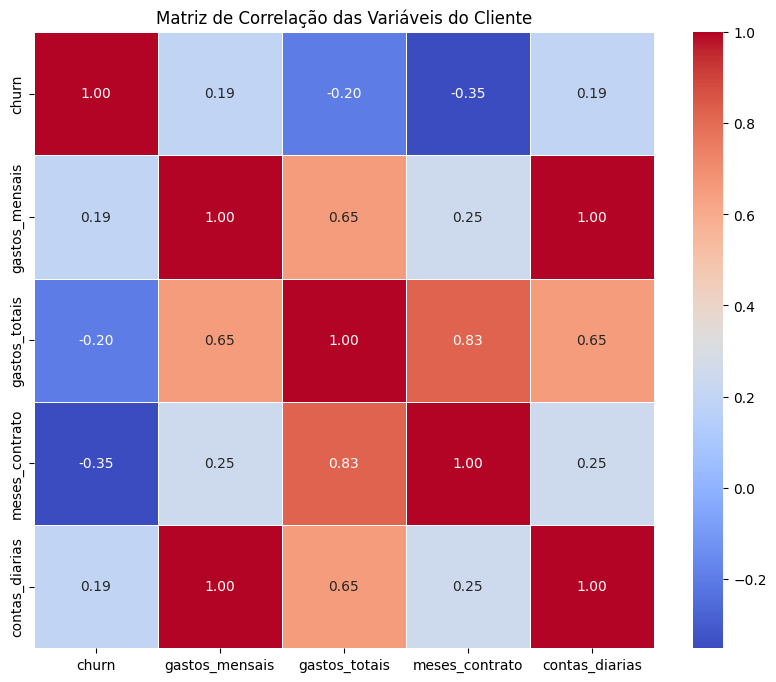

In [23]:
#Calcula a matriz de correlação
matriz_correlacao = df_corr.corr()

#Configura o tamanho da figura
plt.figure(figsize=(10, 8))

#Cria o heatmap
sns.heatmap(matriz_correlacao,
            annot=True,          # Mostra os valores de correlação
            cmap='coolwarm',     # Define a paleta de cores
            fmt=".2f",           # Formato dos números com 2 casas decimais
            linewidths=.5)       # Espaçamento entre as células

#Adicione um título
plt.title('Matriz de Correlação das Variáveis do Cliente')

#Mostra o gráfico
plt.show()

/tmp/ipython-input-948428800.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='meses_contrato', data=dados, palette='pastel')


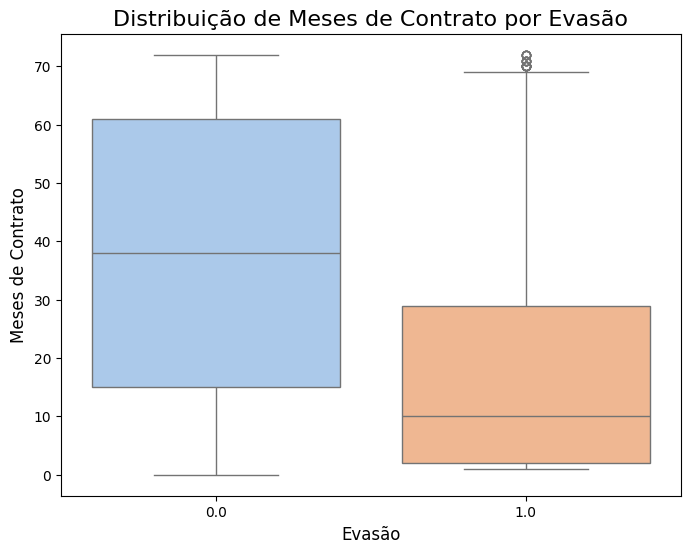

In [25]:
#Análises direcionadas

plt.figure(figsize=(8, 6))

#Cria o box plot
sns.boxplot(x='churn', y='meses_contrato', data=dados, palette='pastel')

#Adiciona títulos e rótulos
plt.title('Distribuição de Meses de Contrato por Evasão', fontsize=16)
plt.xlabel('Evasão', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)

#Exibe o gráfico
plt.show()

/tmp/ipython-input-3948153871.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='gastos_totais', data=dados, palette='muted')


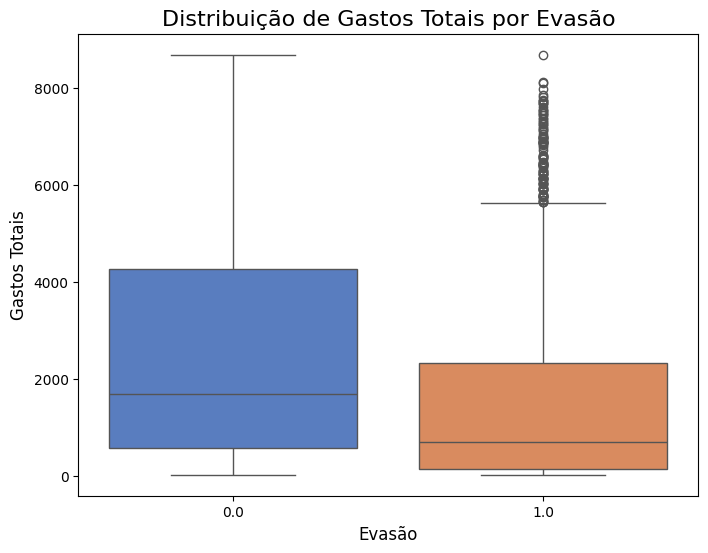

In [26]:
#Define o tamanho do gráfico
plt.figure(figsize=(8, 6))

#Cria o box plot
sns.boxplot(x='churn', y='gastos_totais', data=dados, palette='muted')

#Adiciona títulos e rótulos
plt.title('Distribuição de Gastos Totais por Evasão', fontsize=16)
plt.xlabel('Evasão', fontsize=12)
plt.ylabel('Gastos Totais', fontsize=12)

#Exibe o gráfico
plt.show()

## Modelagem Preditiva

In [27]:
#bibliotecas necessárias
from sklearn.model_selection import train_test_split
import pandas as pd

In [32]:
#Variáveis preditoras (X): todas as colunas exceto 'Churn'
X = df_encoder.drop('churn', axis=1)

#Variável alvo (y): a coluna 'Churn'
y = df_encoder['churn']

In [33]:
#test_size=0.20 significa 20% para o conjunto de teste e 80% para o treino
#random_state=42 garante que a divisão seja a mesma sempre que você rodar o código
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, random_state=42)

#Exibe o tamanho de cada conjunto para verificar se a divisão foi feita corretamente
print(f"Formato de X_treino: {X_treino.shape}")
print(f"Formato de X_teste: {X_teste.shape}")
print(f"Formato de y_treino: {y_treino.shape}")
print(f"Formato de y_teste: {y_teste.shape}")

Formato de X_treino: (5813, 24)
Formato de X_teste: (1454, 24)
Formato de y_treino: (5813,)
Formato de y_teste: (1454,)


In [34]:
#Regressão logistica
from sklearn.preprocessing import StandardScaler

#Inicializa o StandardScaler
scaler = StandardScaler()

#Normaliza apenas as colunas numéricas de X_treino e X_teste
#É importante treinar o scaler apenas com os dados de treino e depois aplicá-lo nos dois
X_treino_normalizado = scaler.fit_transform(X_treino)
X_teste_normalizado = scaler.transform(X_teste)

ValueError: could not convert string to float: 'No phone service'

NameError: name 'X_treino_normalizado' is not defined

# Interpretação dos resultados e entrega de insights

# Comunicação técnica com foco estratégico